# Importing Libraries and dataset

In [0]:
pip install fbprophet

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Importing csv file from local drive

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving avocado.csv to avocado.csv


In [0]:
import io
avocado_df = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))

In [0]:
avocado_df.head()

# Viewing dataset

In [0]:
avocado_df.head()



*   Date: The date of observation
*   AveragePrice : The average price of single avocado
*   Total Volume : Total number of avocados sold
*   4046 : Total number of avocados with PLU 4046 sold
*   4225 : Total number of avocados with PLU 4225 sold
*   4770 : Total number of avocados with PLU 4770 sold
*   type : conventional or organic 
*   year : the year
*   region : The city or region of observation







In [0]:
avocado_df.tail(10)

In [0]:
avocado_df.describe()

In [0]:
avocado_df.info()

In [0]:
#find number of null values
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Exploring Dataset

In [0]:
avocado_df = avocado_df.sort_values('Date')

In [0]:
avocado_df

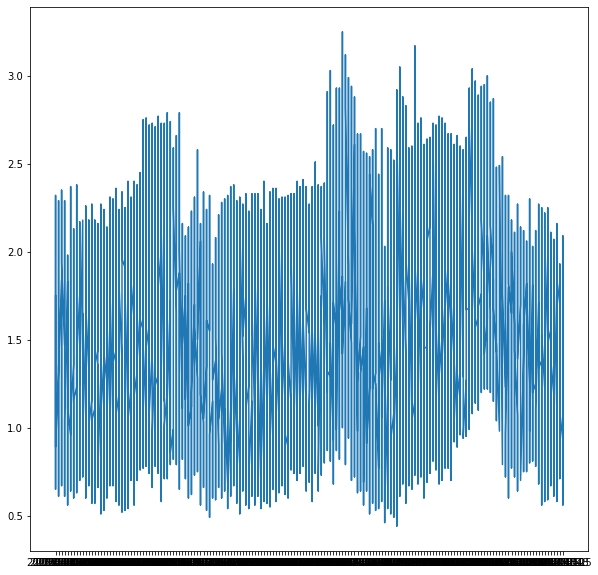

In [0]:
plt.figure(figsize=(10, 10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

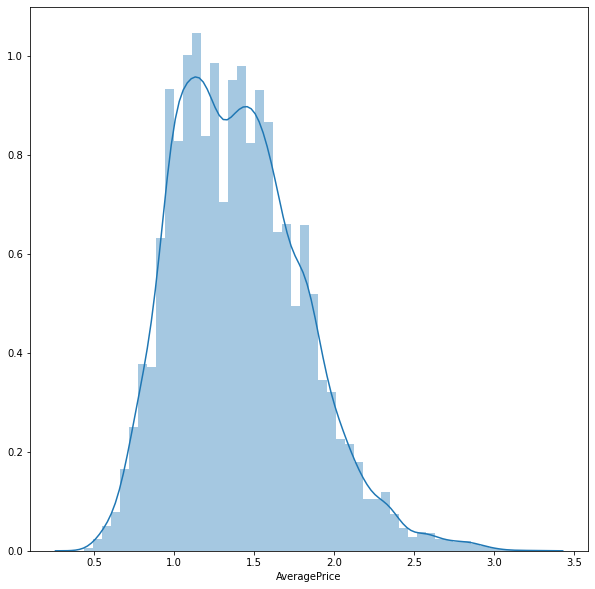

In [0]:
plt.figure(figsize=(10, 10))
sns.distplot(avocado_df['AveragePrice'])

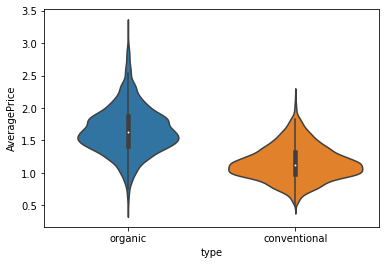

In [0]:
sns.violinplot(x='type', y='AveragePrice', data=avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

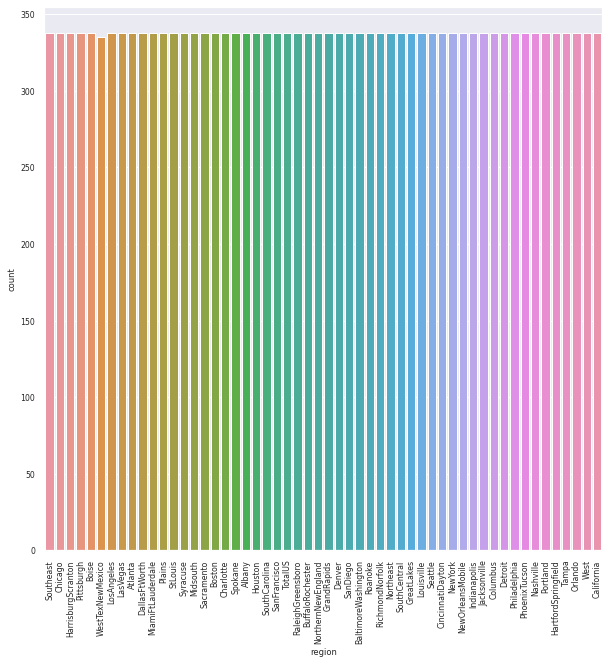

In [0]:
#count number of regions
sns.set(font_scale=0.7)
plt.figure(figsize=(10, 10))
sns.countplot(x='region', data=avocado_df)
plt.xticks(rotation=90)

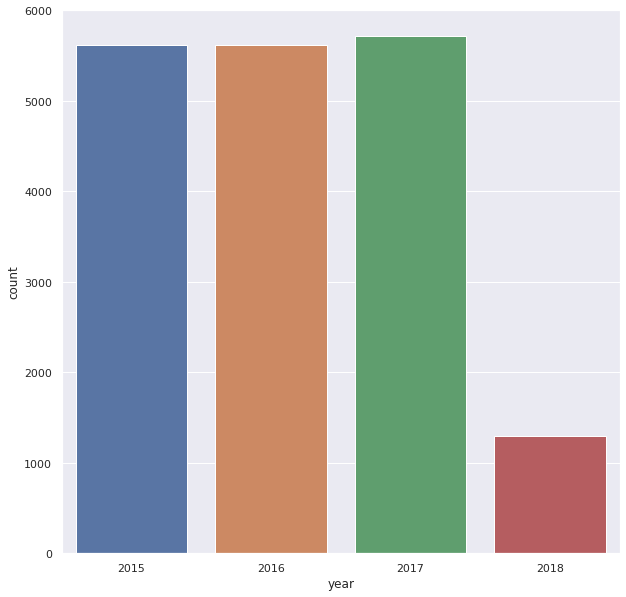

In [0]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.countplot(x='year', data=avocado_df)

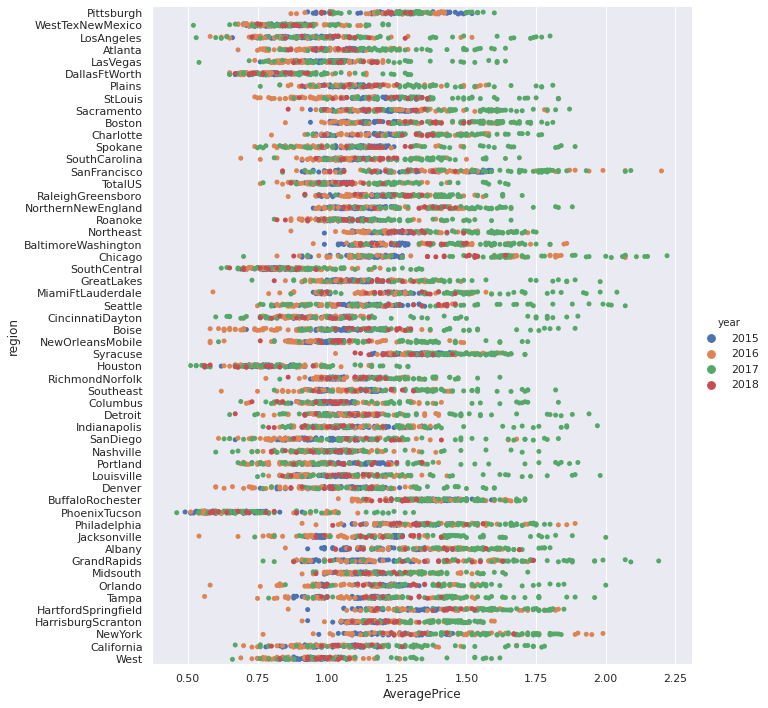

In [0]:
conventional = sns.catplot(x='AveragePrice', y='region', data=avocado_df[avocado_df['type']=='conventional'], hue='year', height=10)

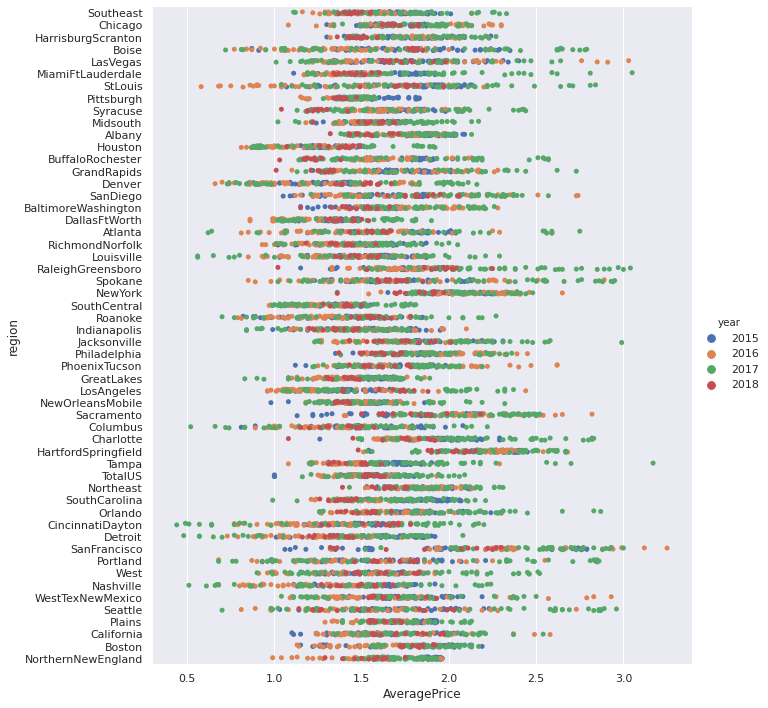

In [0]:
organic = sns.catplot(x='AveragePrice', y='region', data=avocado_df[avocado_df['type']=='organic'], hue='year', height=10)

# Prepare data for facebook prophet

In [0]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [0]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [0]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [0]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [0]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# Understand intuition behind facebook prophet



*   Prophet : It is an open source software release by Facebook's Core Data Science Team.
> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.



1.   Accurate and Fast


> Facebook team uses Prophet for accurate forecasting and planning.
Prophet can generate results in seconds


2.   Automatic
> No need to perform data preprocessing. Prophet works with missing data with several outliers.
3.   Domain knowledge Integration
> Users can tweak forecast by manually adding domain specific knowledge







# Developing model and making predictions - 1

In [0]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#forecasting future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [0]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496497,0.911902,1.883546,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
1,2015-01-04,1.496497,0.892517,1.853655,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
2,2015-01-04,1.496497,0.918176,1.876348,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
3,2015-01-04,1.496497,0.876905,1.879206,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
4,2015-01-04,1.496497,0.904069,1.852199,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161789,0.571538,1.615883,0.975495,1.341400,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,0.0,0.0,0.0,1.075605
18610,2019-03-22,1.161059,0.528742,1.590835,0.973895,1.341947,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,0.0,0.0,0.0,1.076534
18611,2019-03-23,1.160328,0.561691,1.625352,0.972294,1.341847,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,0.0,0.0,0.0,1.077735
18612,2019-03-24,1.159597,0.546406,1.636006,0.970885,1.341809,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,0.0,0.0,0.0,1.079190


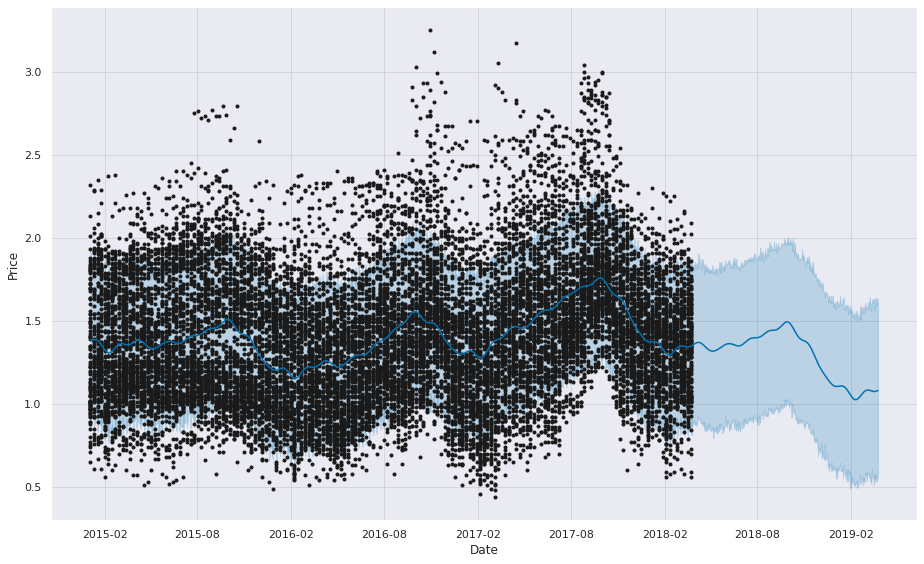

In [0]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price', figsize=(13,8))

In [0]:
print('Max value = ',max(avocado_df['AveragePrice']))
avocado_df[avocado_df['AveragePrice']==3.25]

Max value =  3.25


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14125,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.0,3232.16,3232.16,0.0,0.0,organic,2016,SanFrancisco


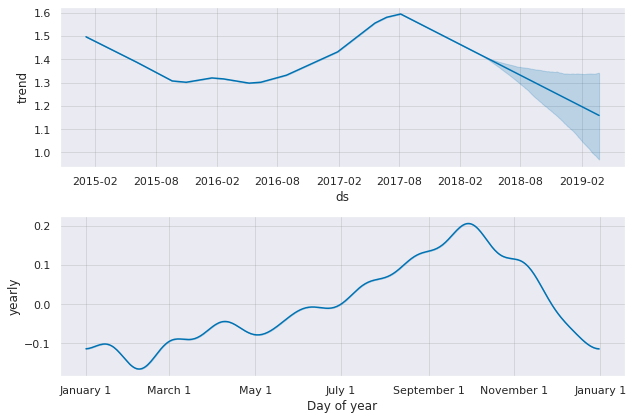

In [0]:
figure2 = m.plot_components(forecast)

# Developing model and making predictions(Region Specific) - 2

In [0]:
avocado_sample_df = avocado_df[avocado_df['region']=='West']

In [0]:
avocado_sample_df

In [0]:
avocado_sample_df.sort_values('Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


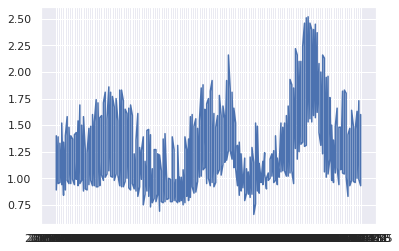

In [0]:
plt.plot(avocado_sample_df['Date'], avocado_sample_df['AveragePrice'])

In [0]:
avocado_sample_df = avocado_sample_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [0]:
m = Prophet()
m.fit(avocado_sample_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [0]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287798,0.676881,1.542827,1.287798,1.287798,-0.187733,-0.187733,-0.187733,-0.187733,-0.187733,-0.187733,0.0,0.0,0.0,1.100065
1,2015-01-04,1.287798,0.694415,1.549096,1.287798,1.287798,-0.187733,-0.187733,-0.187733,-0.187733,-0.187733,-0.187733,0.0,0.0,0.0,1.100065
2,2015-01-11,1.285550,0.703701,1.545343,1.285550,1.285550,-0.171817,-0.171817,-0.171817,-0.171817,-0.171817,-0.171817,0.0,0.0,0.0,1.113733
3,2015-01-11,1.285550,0.692243,1.572068,1.285550,1.285550,-0.171817,-0.171817,-0.171817,-0.171817,-0.171817,-0.171817,0.0,0.0,0.0,1.113733
4,2015-01-18,1.283303,0.681565,1.546391,1.283303,1.283303,-0.163318,-0.163318,-0.163318,-0.163318,-0.163318,-0.163318,0.0,0.0,0.0,1.119985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2019-03-21,1.725328,1.090152,1.923633,1.692646,1.756959,-0.207316,-0.207316,-0.207316,-0.207316,-0.207316,-0.207316,0.0,0.0,0.0,1.518012
699,2019-03-22,1.725887,1.076449,1.967261,1.693167,1.757661,-0.202307,-0.202307,-0.202307,-0.202307,-0.202307,-0.202307,0.0,0.0,0.0,1.523580
700,2019-03-23,1.726446,1.112143,1.926663,1.693705,1.758318,-0.196732,-0.196732,-0.196732,-0.196732,-0.196732,-0.196732,0.0,0.0,0.0,1.529714
701,2019-03-24,1.727005,1.104200,1.939158,1.694190,1.758973,-0.190694,-0.190694,-0.190694,-0.190694,-0.190694,-0.190694,0.0,0.0,0.0,1.536311


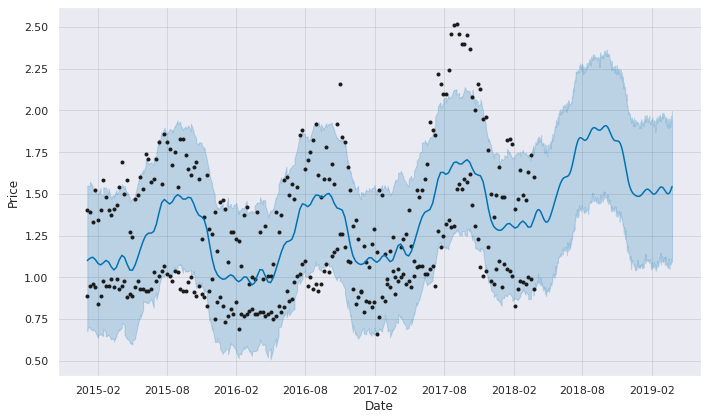

In [0]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
# at 2015-02, It takes average of all the prices with month 02 of year 2015
# (1.48+0.95+0.98+1.58+1.40+0.89+1.34+0.84)/8 = 1.1825

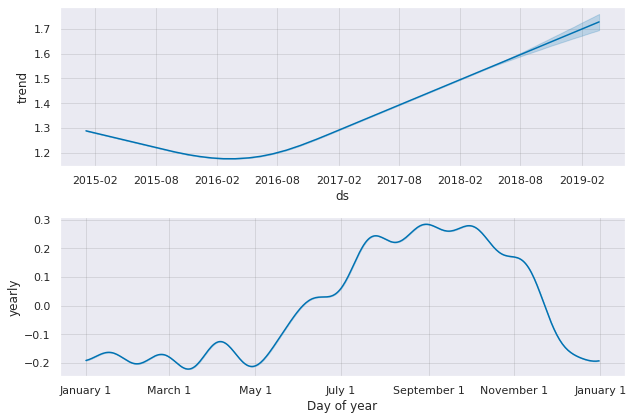

In [0]:
figure2 = m.plot_components(forecast)

**Region = Chicago**

---



In [0]:
avocado_sample_df = avocado_df[avocado_df['region']=='Chicago']

In [0]:
avocado_sample_df

In [0]:
avocado_sample_df.sort_values('Date')

In [0]:
avocado_sample_df = avocado_sample_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


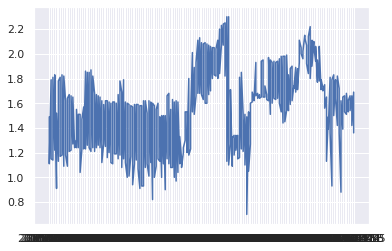

In [0]:
plt.plot(avocado_sample_df['ds'], avocado_sample_df['y'])

In [0]:
m = Prophet()
m.fit(avocado_sample_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


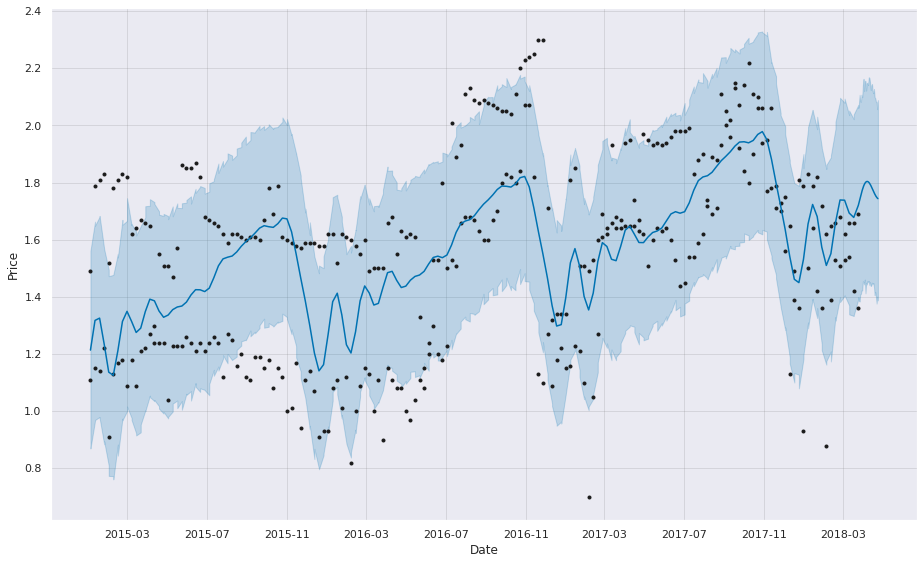

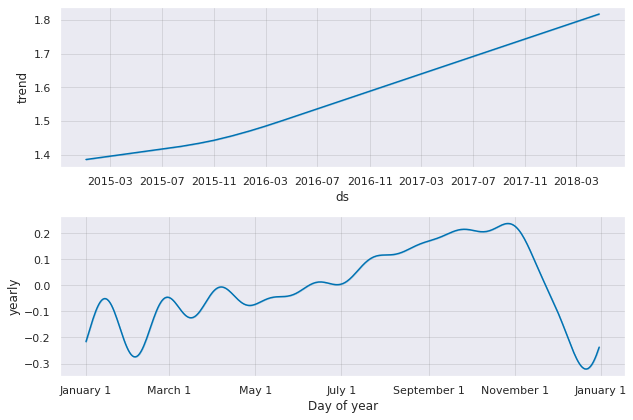

In [0]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
figure1 = m.plot(forecast, xlabel='Date', ylabel='Price', figsize=(13,8))
figure2 = m.plot_components(forecast)

In [0]:
forecast

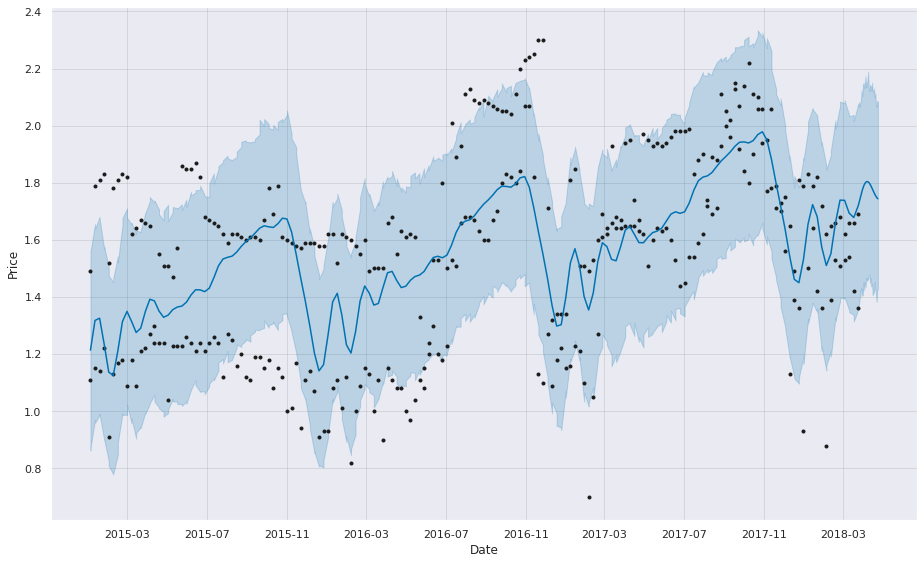

In [0]:
figure1 = m.plot(forecast, xlabel='Date', ylabel='Price', figsize=(13,8))

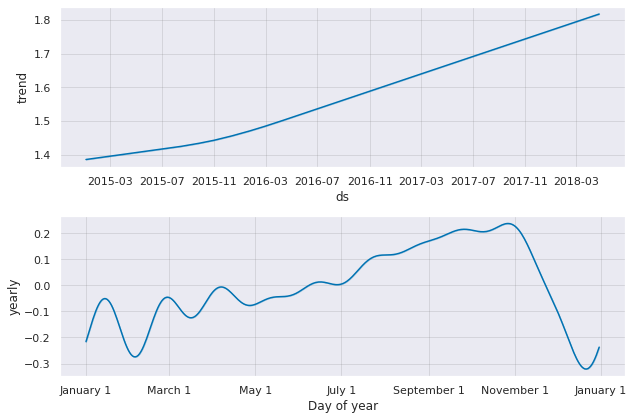

In [0]:
figure2 = m.plot_components(forecast)

In [0]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
